In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import copy
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import os
import plotly.express as px

In [2]:
work_dir=Path("/scratch/fransjevanoors/global_sr")
# work_dir=Path("/mnt/u/LSM root zone/global_sr")

In [4]:
f = f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv'
df = pd.read_csv(f,index_col=0)
sr_df = pd.read_csv(f'{work_dir}/output/sr_calculation/sr_all_catchments_maxmin.csv',index_col=0)
df['sr_20'] = sr_df['20'] #add sr column to catchment characteristic dataframe
df

,p_mean,ep_mean,q_mean,t_mean,ai,hai,tdiff_max,tdiff_mean,idu_mean,idu_max,...,pd,pop,nld,clt,lc,lit,st.1,lat,lon,sr_20
de_0000778,4.045309,2.057641,0.842493,7.638991,1.965994,0.337366,24.641665,20.637500,2.86,16.13,...,22.02160,14377.860,0.241560,Snow,Forest,Unconsolidated sediments,NaN,47.723927,11.933343,157.992699
br_0001850,4.186528,2.943133,1.030596,25.107997,1.422473,0.967762,6.181352,4.359281,7.14,72.03,...,27.11160,201182.800,0.491105,Equatorial,Agriculture,Acid plutonic rocks,NaN,-16.616687,-49.718967,362.006222
ca_0003156,1.235331,1.331096,0.017540,3.742158,0.928056,1.003734,43.900205,36.056585,5.33,30.03,...,1.07419,46994.660,0.315056,Snow,Agriculture,Siliciclastic sedimentary rocks,NaN,49.506681,-103.275867,NaN
br_0001299,3.123837,2.907271,1.032392,24.338485,1.074491,1.257753,6.634216,5.093589,4.47,24.80,...,2.69709,12372.820,0.411808,Equatorial,No dominant class,Metamorphics,NaN,-17.108293,-39.967427,124.343362
br_0001843,4.453621,2.944259,1.377108,24.223189,1.512646,0.877896,6.469796,4.538261,7.15,73.73,...,218.07500,2077434.000,0.342362,Equatorial,Agriculture,Metamorphics,NaN,-16.539263,-49.184522,272.933910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ca_0001384,3.196726,1.852481,2.053996,2.880652,1.725645,0.341004,40.004254,33.168757,2.74,11.63,...,1.17995,12177.410,NaN,Snow,Forest,Metamorphics,NaN,47.253879,-72.245291,11.128719
us_0001647,3.412146,2.749842,2.050785,18.061075,1.240852,0.855017,24.183295,20.816630,4.07,18.73,...,22.21370,2942.327,0.320770,Warm Temperate,Forest,Metamorphics,NaN,33.018864,-83.604070,34.592017
gb_0000044,2.269773,1.157692,1.016338,9.472414,1.960603,0.677501,17.949959,13.999706,3.36,17.43,...,537.57700,312431.700,0.299489,Warm Temperate,Agriculture,Carbonate sedimentary rocks,NaN,53.261171,-1.396872,111.842086
br_0000392,4.171185,3.215613,1.172224,25.953768,1.297166,1.004279,4.744549,3.214524,9.28,87.60,...,4.07883,1688865.000,NaN,Equatorial,Shrubland,No dominant class,NaN,-12.531370,-47.860721,NaN


In [5]:
df.columns

Index(['p_mean', 'ep_mean', 'q_mean', 't_mean', 'ai', 'hai', 'tdiff_max',
       'tdiff_mean', 'idu_mean', 'idu_max', 'hpd_mean', 'hpd_max', 'hpf',
       'lpf', 'si_p', 'si_ep', 'phi', 'de', 'dp', 'dt', 'sp', 'st', 'se', 'sd',
       'sti', 'ftf', 'idu_mean_l', 'idu_max_l', 'hpd_mean_l', 'hpd_max_l',
       'hpf_l', 'lpf_l', 'si_pl', 'phi_l', 'de_l', 'dp_l', 'dt_l', 'sp_l',
       'st_l', 'se_l', 'sd_l', 'sti_l', 'tc', 'ntc', 'nonveg', 'area',
       'ir_mean', 'el_mean', 'el_min', 'el_max', 'el_std', 'drd', 'slp_mean',
       'slp_max', 'slp_min', 'slp_std', 'cla', 'snd', 'slt', 'tpi', 'bp',
       'dtb', 'iwu', 'ds', 'dv', 'pd', 'pop', 'nld', 'clt', 'lc', 'lit',
       'st.1', 'lat', 'lon', 'sr_20'],
      dtype='object')

In [15]:
# features = ['sr_20','p_mean','si_p','ep_mean','ai','t_mean','slp_mean','el_mean','tdiff_max','idu_mean','slp_mean','tdiff_max',
            # 'cla','hai','tpi','sp','st','se','sd','phi_l','hpd_mean_l','lpf'] # the order of these variables seems to matter, but why?
# features = ['sr_20','p_mean','si_p','ep_mean','ai','t_mean','slp_mean','el_mean'] 
features = ['p_mean', 'ep_mean','ai', 'hai','tdiff_mean','ftf', 'idu_mean_l', 'hpd_mean_l',
       'hpf_l', 'lpf_l', 'si_pl','si_ep', 'phi_l', 'de_l', 'dp_l', 'dt_l', 'sp_l',
       'st_l', 'se_l', 'sd_l','el_mean', 'drd', 'slp_mean','cla', 'snd', 'slt', 'tpi','sr_20']
lf = len(features)
print('length of features:', lf)
X = df[features]
X = X.dropna()
X = StandardScaler().fit_transform(X) #standardize all values
X = pd.DataFrame(X,columns=features)

pca = PCA(n_components=lf)
components = pca.fit_transform(X)

loadings = pca.components_ #eigenvector, length represents variance var explains
 
# Create dataframe
pca_df = pd.DataFrame(data=components[:,0:2],columns=['PC1', 'PC2'])

length of features: 28


In [7]:
pca_df_scaled = pca_df.copy()
 
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min()) # WAAROM DIT?
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

per_var  = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
per_var

array([24.6, 18.9,  7.6,  6.8,  5.5,  4.8,  4.2,  3.4,  3.3,  3.2,  3.2,
        2.2,  2. ,  1.7,  1.5,  1.3,  1. ,  0.9,  0.8,  0.7,  0.6,  0.5,
        0.3,  0.3,  0.2,  0.1,  0.1,  0.1,  0.1,  0. ])

In [21]:
# split features for visualization of PCA
features1=['sr_20','p_mean', 'ep_mean','ai', 'hai', 'tdiff_mean', 'idu_mean_l']
features2 = ['sr_20','hpf_l', 'lpf_l','si_pl','si_ep', 'phi_l']
features3=['sr_20','ftf','el_mean', 'slp_mean','tpi']
features4=['sr_20', 'de_l', 'dp_l', 'dt_l', 'sp_l','st_l', 'se_l', 'sd_l', 'hpd_mean_l']
features5=['sr_20', 'drd','cla', 'snd', 'slt']

In [34]:
ld_df = pd.DataFrame(index=features, columns=['xs','ys'])
ld_df['xs'] = loadings[0]
ld_df['ys'] = loadings[1]
ld_df['len'] = np.sqrt(loadings[0]**2+loadings[1]**2)
ld_df

,xs,ys,len
p_mean,0.225290,-0.243139,0.331470
ep_mean,0.310873,0.109575,0.329619
ai,-0.006638,-0.381963,0.382021
hai,0.068583,0.312606,0.320041
tdiff_mean,-0.342998,0.038763,0.345181
ftf,-0.272367,0.061951,0.279324
idu_mean_l,-0.010010,0.373339,0.373474
hpd_mean_l,0.107272,0.356395,0.372189
hpf_l,-0.234054,0.214324,0.317358
lpf_l,-0.238386,0.326789,0.404498


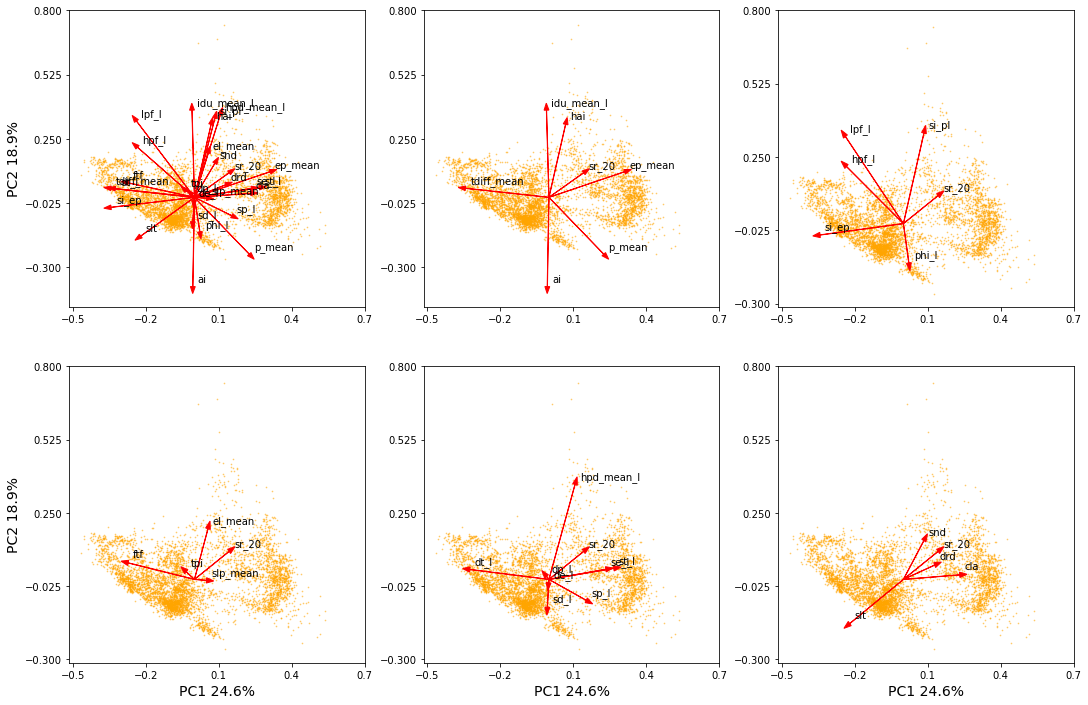

In [43]:
xs = loadings[0]
ys = loadings[1]

fig=plt.figure(figsize=(18,12))
ax = fig.add_subplot(231)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')

for i, varnames in enumerate(features):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features[i]]['xs'], # length of the arrow along x
        ld_df.loc[features[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features[i]]['xs']+0.02, ld_df.loc[features[i]]['ys']+0.02, varnames,size=10)
    
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
# ax.set_xlabel(f'PC1 {per_var[0]}%')
ax.set_ylabel(f'PC2 {per_var[1]}%',size=14)


ax = fig.add_subplot(232)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')

for i, varnames in enumerate(features1):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features1[i]]['xs'], # length of the arrow along x
        ld_df.loc[features1[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features1[i]]['xs']+0.02, ld_df.loc[features1[i]]['ys']+0.02, varnames,size=10)
    
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
# ax.set_xlabel(f'PC1 {per_var[0]}%')
# ax.set_ylabel(f'PC2 {per_var[1]}%')

ax = fig.add_subplot(233)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')

for i, varnames in enumerate(features2):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features2[i]]['xs'], # length of the arrow along x
        ld_df.loc[features2[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features2[i]]['xs']+0.02, ld_df.loc[features2[i]]['ys']+0.02, varnames,size=10)
    
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
# ax.set_xlabel(f'PC1 {per_var[0]}%')
# ax.set_ylabel(f'PC2 {per_var[1]}%')

ax = fig.add_subplot(234)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')

for i, varnames in enumerate(features3):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features3[i]]['xs'], # length of the arrow along x
        ld_df.loc[features3[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features3[i]]['xs']+0.02, ld_df.loc[features3[i]]['ys']+0.02, varnames,size=10)
    
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlabel(f'PC1 {per_var[0]}%',size=14)
ax.set_ylabel(f'PC2 {per_var[1]}%',size=14)

ax = fig.add_subplot(235)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')

for i, varnames in enumerate(features4):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features4[i]]['xs'], # length of the arrow along x
        ld_df.loc[features4[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features4[i]]['xs']+0.02, ld_df.loc[features4[i]]['ys']+0.02, varnames,size=10)
    
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlabel(f'PC1 {per_var[0]}%',size=14)
# ax.set_ylabel(f'PC2 {per_var[1]}%')

ax = fig.add_subplot(236)
ax.scatter(pca_df_scaled.PC1,pca_df_scaled.PC2,s=0.5,alpha=0.5,color='orange')

for i, varnames in enumerate(features5):
    ax.arrow(
        0, 0, # coordinates of arrow base
        ld_df.loc[features5[i]]['xs'], # length of the arrow along x
        ld_df.loc[features5[i]]['ys'], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(ld_df.loc[features5[i]]['xs']+0.02, ld_df.loc[features5[i]]['ys']+0.02, varnames,size=10)
    
xticks = np.linspace(-0.5,0.7, num=5)
yticks = np.linspace(-0.3,0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlabel(f'PC1 {per_var[0]}%',size=14)
# ax.set_ylabel(f'PC2 {per_var[1]}%')
fig.savefig(f'{work_dir}/output/figures/pca/pca_scatters.jpg',bbox_inches='tight',dpi=300)


In [53]:
ld_sort = ld_df.sort_values('len',ascending=False)
ld_sort = ld_sort[0:10]
ld_sort['rank'] = np.arange(1,11,1)
ld_sort = ld_sort.drop(columns=['xs','ys'])
ld_sort

,len,rank
lpf_l,0.404498,1
ai,0.382021,2
idu_mean_l,0.373474,3
hpd_mean_l,0.372189,4
si_pl,0.349997,5
si_ep,0.345447,6
tdiff_mean,0.345181,7
p_mean,0.331470,8
ep_mean,0.329619,9
dt_l,0.327161,10
